## Data Analysis pipeline for all datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df = pd.read_excel(r"C:\github\news\news\german-news\clean_data\xlsx\bild.xlsx")
df

,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,content_title,content_description,content_body,Fake News,Extreme bias,clickbait,credible
0,bild,https://www.bild.de/politik/ausland/politik-au...,"linke, migration, csu, cdu",2022-06-15,2022-06-15,2024-10-20,Filipp Piatov und Ralf Schuler,NaN,NaN,Sie verspottete Deutsche als Kartoffeln: Aktiv...,Schon wieder sorgt eine Personalentscheidung d...,Schon wieder sorgt eine Personalentscheidung d...,1.0,1.0,1.0,0.0
1,bild,https://www.bild.de/politik/ausland/politik-au...,israel,2023-11-10,2023-11-10,2024-10-20,"P. Tiede, A. Link und H.-J. Vehlewald",NaN,NaN,Reporter als Terror-Helfer: Die perfide Propag...,"Es ist der 7. Oktober 2023. Der Tag, der alles...","Es ist der 7. Oktober 2023. Der Tag, der alles...",1.0,1.0,0.0,0.0
2,bild,https://www.bild.de/politik/inland/politik-inl...,"fdp, csu, spd, cdu, afd, annalena baerbock, ch...",2023-06-19,2023-06-19,2024-10-20,Filipp Piatov,NaN,"CDU, CSU, die Gruenen, SPD, Wuest Hendrik, Mer...",Streit in der CDU: Umfrage-Schlacht zwischen M...,In der CDU liegen die Nerven blank! Es tobt ei...,In der CDU liegen die Nerven blank! Spaetesten...,0.0,1.0,0.0,0.0
3,bild,https://www.bild.de/politik/ausland/politik-au...,"israel, spd, olaf scholz",2023-10-30,2023-10-30,2024-10-20,NaN,BILD,"Gaza-Streifen, Gaza, Israel, Hamas, Nahost-Kon...",Shani Louk ermordet Scholz: Zeigt die ganze B...,Shani Louk wurde barbarisch ermordet. Das best...,Es ist das pure Grauen. Am 7. Oktober verschle...,0.0,0.0,0.0,1.0
4,bild,https://www.bild.de/regional/leipzig/leipzig-n...,"abschiebung, migration, cdu",2023-11-09,2023-11-09,2024-10-20,KARL KEIM,NaN,"Tunesien, Georgien, Sachsen, asylrecht, Schust...",Sachsen: Nur jede dritte Abschiebung findet wi...,In Sachsen klappt nur jede dritte Abschiebung....,Leipzig In Sachsen wurden bisher in diesem Ja...,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,bild,https://www.bild.de/politik/ausland/politik/ha...,israel,2023-10-07,2023-10-07,2024-10-20,"Hans-Joerg Vehlewald, Peter Tiede, Filipp Piat...",NaN,"Gaza-Streifen, Gaza, Israel, Hamas, Nahost-Kon...",Hamas entfuehrt Israelis: Terroristen verschle...,Palaestinensische Hamas-Terroristen entfuehren...,Es sind Bilder voller Niedertracht und Mensche...,NaN,NaN,NaN,NaN
193,bild,https://www.bild.de/politik/ausland/politik-au...,"israel, nahost",2023-11-09,2023-11-09,2024-10-20,Marion Horn,NaN,"Gaza-Streifen, Gaza, Israel, Hamas, Nahost-Kon...",Kommentar von BILD-Chefin Marion Horn: Journal...,"Es ist ein furchtbarer, ein ungeheuerlicher Ve...","Es ist ein furchtbarer, ein ungeheuerlicher Ve...",NaN,NaN,NaN,NaN
194,bild,https://www.bild.de/politik/inland/politik-inl...,"fdp, csu, spd, bundestagswahl, cdu, afd, alice...",2023-06-22,2023-06-22,2024-10-20,Filipp Piatov und Juilan Roepcke,NaN,"CDU, die Gruenen, SPD, Alternative fuer Deutsc...",Deshalb geht die Rechtsaussen-Partei aufs Ganz...,Die AfD will bei der naechsten Bundestagswahl ...,Die AfD dreht auf! Erstmals will die Rechtsaus...,NaN,NaN,NaN,NaN
195,bild,https://www.bild.de/politik/ausland/politik-au...,"israel, einwanderung",2023-12-07,2023-12-07,2024-10-20,NaN,BILD,"Israel, Ukraine, USA, Republican Party, Hamas,...",US-Senat blockiert Milliarden-Paket fuer Israe...,US-Praesident Joe Biden hatte den Kongress um ...,"Machen Sie keinen Fehler, die heutige Abstimmu...",NaN,NaN,NaN,NaN


We will first have to get a look at our data and understand it

In [3]:
labels = ['Fake News', 'Extreme bias', 'clickbait', 'credible']
df[labels].sum()

Fake News       17.0
Extreme bias    24.0
clickbait       27.0
credible        32.0
dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   news_outlet          197 non-null    object        
 1   provenance           197 non-null    object        
 2   query_keywords       197 non-null    object        
 3   creation_date        197 non-null    datetime64[ns]
 4   last_modified        197 non-null    datetime64[ns]
 5   crawl_date           197 non-null    datetime64[ns]
 6   author_person        153 non-null    object        
 7   author_organization  44 non-null     object        
 8   news_keywords        192 non-null    object        
 9   content_title        197 non-null    object        
 10  content_description  197 non-null    object        
 11  content_body         197 non-null    object        
 12  Fake News            59 non-null     float64       
 13  Extreme bias         59 non-null   

plot of label distr

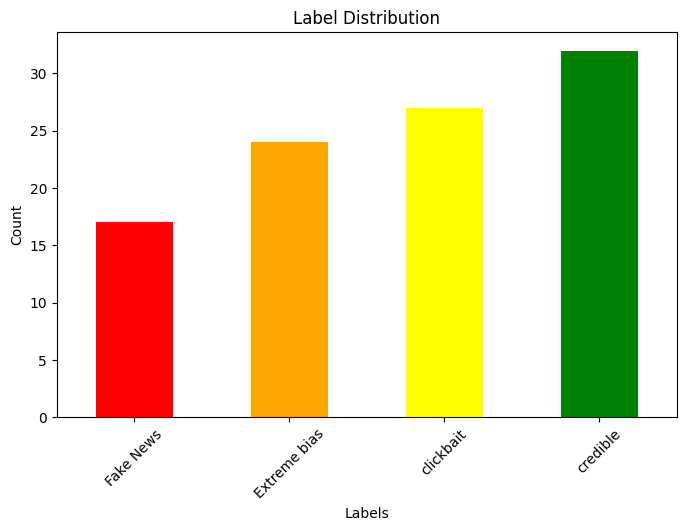

In [5]:
def plot_label_distribution(df, labels):
    label_counts = df[labels].sum()
    label_counts.plot(kind='bar', figsize=(8, 5), color=['red', 'orange', 'yellow', 'green'])
    plt.title('Label Distribution')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

labels = ['Fake News', 'Extreme bias', 'clickbait', 'credible']
plot_label_distribution(df, labels)

text length distribution

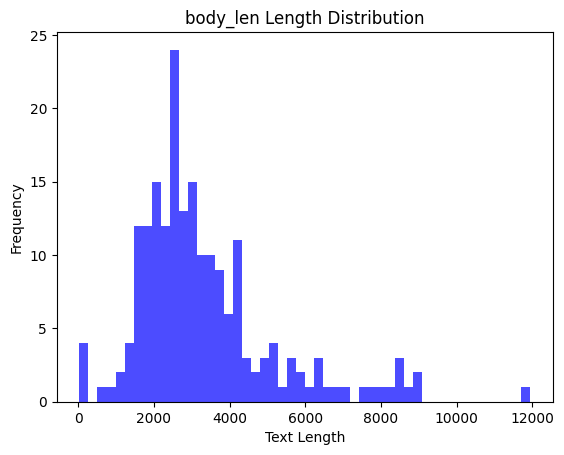

In [6]:
df['body_len'] = df['content_body'].str.len()

def plot_text_length_distribution(df, column):
    plt.hist(df[column], bins=50, color='blue', alpha=0.7)
    plt.title(f'{column} Length Distribution')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

plot_text_length_distribution(df, 'body_len')

len of article vs label

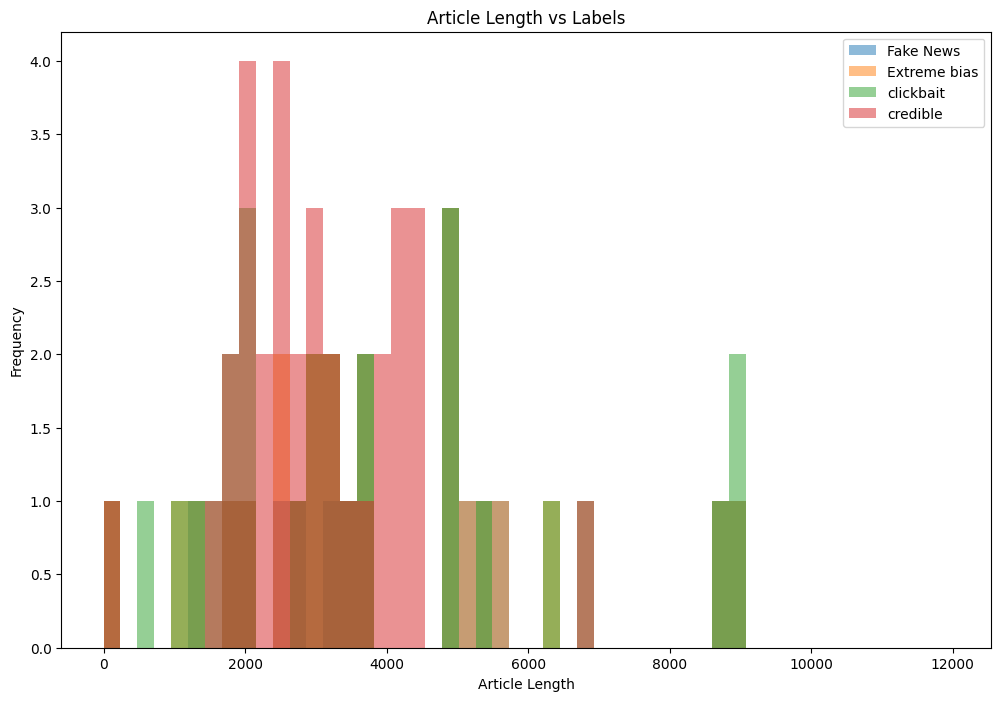

In [7]:
def plot_length_vs_label(df, labels, length_column):
    plt.figure(figsize=(12, 8))
    for label in labels:
        filtered = df[df[label] == 1]
        plt.hist(
            filtered[length_column], 
            bins=50, 
            alpha=0.5, 
            label=label,
            range=(0, df[length_column].max())
        )
    plt.title(f'Article Length vs Labels')
    plt.xlabel('Article Length')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_length_vs_label(df, labels, 'body_len')

visualize titles

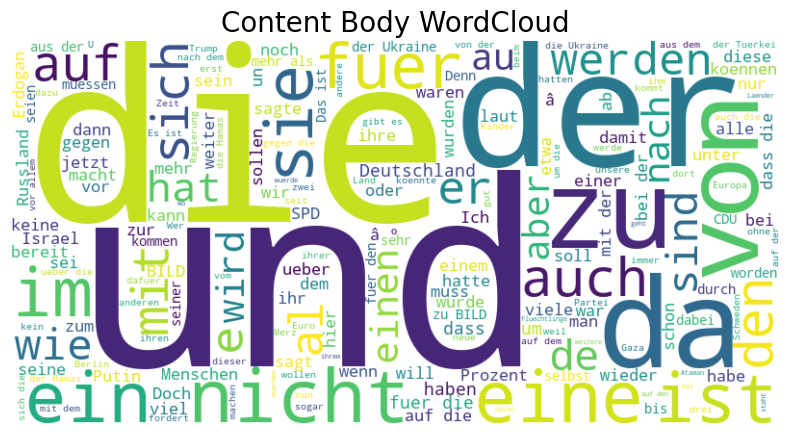

In [8]:
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

create_wordcloud(df['content_body'].dropna(), 'Content Body WordCloud')

visualize text

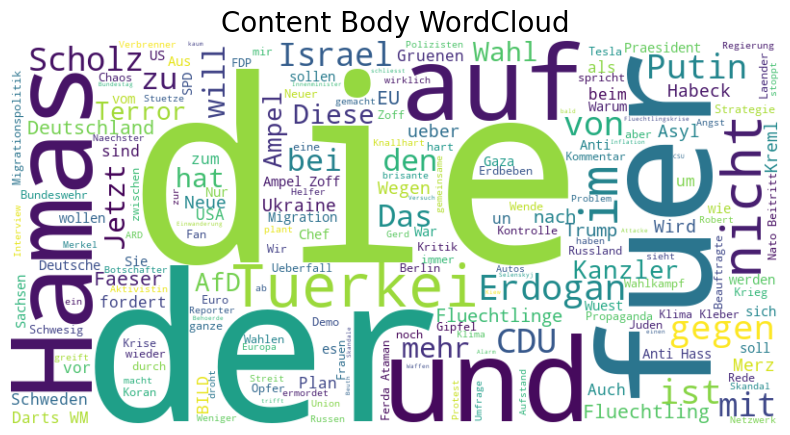

In [9]:
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

create_wordcloud(df['content_title'].dropna(), 'Content Body WordCloud')

split df to labelled and not labelled

In [10]:
df['has_label'] = df[labels].notna().any(axis=1)
labelled_df = df[df['has_label']]
unlabelled_df = df[~df['has_label']]

print(f"Labelled Data: {len(labelled_df)} rows")
print(f"Unlabelled Data: {len(unlabelled_df)} rows")

Labelled Data: 59 rows
Unlabelled Data: 138 rows


In [11]:
labelled_df.head()

,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,content_title,content_description,content_body,Fake News,Extreme bias,clickbait,credible,body_len,has_label
0,bild,https://www.bild.de/politik/ausland/politik-au...,"linke, migration, csu, cdu",2022-06-15,2022-06-15,2024-10-20,Filipp Piatov und Ralf Schuler,NaN,NaN,Sie verspottete Deutsche als Kartoffeln: Aktiv...,Schon wieder sorgt eine Personalentscheidung d...,Schon wieder sorgt eine Personalentscheidung d...,1.0,1.0,1.0,0.0,3574,True
1,bild,https://www.bild.de/politik/ausland/politik-au...,israel,2023-11-10,2023-11-10,2024-10-20,"P. Tiede, A. Link und H.-J. Vehlewald",NaN,NaN,Reporter als Terror-Helfer: Die perfide Propag...,"Es ist der 7. Oktober 2023. Der Tag, der alles...","Es ist der 7. Oktober 2023. Der Tag, der alles...",1.0,1.0,0.0,0.0,5226,True
2,bild,https://www.bild.de/politik/inland/politik-inl...,"fdp, csu, spd, cdu, afd, annalena baerbock, ch...",2023-06-19,2023-06-19,2024-10-20,Filipp Piatov,NaN,"CDU, CSU, die Gruenen, SPD, Wuest Hendrik, Mer...",Streit in der CDU: Umfrage-Schlacht zwischen M...,In der CDU liegen die Nerven blank! Es tobt ei...,In der CDU liegen die Nerven blank! Spaetesten...,0.0,1.0,0.0,0.0,3071,True
3,bild,https://www.bild.de/politik/ausland/politik-au...,"israel, spd, olaf scholz",2023-10-30,2023-10-30,2024-10-20,NaN,BILD,"Gaza-Streifen, Gaza, Israel, Hamas, Nahost-Kon...",Shani Louk ermordet Scholz: Zeigt die ganze B...,Shani Louk wurde barbarisch ermordet. Das best...,Es ist das pure Grauen. Am 7. Oktober verschle...,0.0,0.0,0.0,1.0,2655,True
4,bild,https://www.bild.de/regional/leipzig/leipzig-n...,"abschiebung, migration, cdu",2023-11-09,2023-11-09,2024-10-20,KARL KEIM,NaN,"Tunesien, Georgien, Sachsen, asylrecht, Schust...",Sachsen: Nur jede dritte Abschiebung findet wi...,In Sachsen klappt nur jede dritte Abschiebung....,Leipzig In Sachsen wurden bisher in diesem Ja...,0.0,0.0,0.0,1.0,2447,True


encode labels

In [12]:
def encode_labels(row, labels):
    return [int(row[label]) for label in labels]

labelled_df['label'] = labelled_df.apply(lambda row: encode_labels(row, labels), axis=1)

labelled_df = labelled_df.rename(
    columns={
        'content_title': 'title',
        'content_description': 'description',
        'content_body': 'body'
    }
)

C:\Users\hanna\AppData\Local\Temp\ipykernel_31188\55246372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled_df['label'] = labelled_df.apply(lambda row: encode_labels(row, labels), axis=1)


In [13]:
labelled_df.head()

,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,title,description,body,Fake News,Extreme bias,clickbait,credible,body_len,has_label,label
0,bild,https://www.bild.de/politik/ausland/politik-au...,"linke, migration, csu, cdu",2022-06-15,2022-06-15,2024-10-20,Filipp Piatov und Ralf Schuler,NaN,NaN,Sie verspottete Deutsche als Kartoffeln: Aktiv...,Schon wieder sorgt eine Personalentscheidung d...,Schon wieder sorgt eine Personalentscheidung d...,1.0,1.0,1.0,0.0,3574,True,"[1, 1, 1, 0]"
1,bild,https://www.bild.de/politik/ausland/politik-au...,israel,2023-11-10,2023-11-10,2024-10-20,"P. Tiede, A. Link und H.-J. Vehlewald",NaN,NaN,Reporter als Terror-Helfer: Die perfide Propag...,"Es ist der 7. Oktober 2023. Der Tag, der alles...","Es ist der 7. Oktober 2023. Der Tag, der alles...",1.0,1.0,0.0,0.0,5226,True,"[1, 1, 0, 0]"
2,bild,https://www.bild.de/politik/inland/politik-inl...,"fdp, csu, spd, cdu, afd, annalena baerbock, ch...",2023-06-19,2023-06-19,2024-10-20,Filipp Piatov,NaN,"CDU, CSU, die Gruenen, SPD, Wuest Hendrik, Mer...",Streit in der CDU: Umfrage-Schlacht zwischen M...,In der CDU liegen die Nerven blank! Es tobt ei...,In der CDU liegen die Nerven blank! Spaetesten...,0.0,1.0,0.0,0.0,3071,True,"[0, 1, 0, 0]"
3,bild,https://www.bild.de/politik/ausland/politik-au...,"israel, spd, olaf scholz",2023-10-30,2023-10-30,2024-10-20,NaN,BILD,"Gaza-Streifen, Gaza, Israel, Hamas, Nahost-Kon...",Shani Louk ermordet Scholz: Zeigt die ganze B...,Shani Louk wurde barbarisch ermordet. Das best...,Es ist das pure Grauen. Am 7. Oktober verschle...,0.0,0.0,0.0,1.0,2655,True,"[0, 0, 0, 1]"
4,bild,https://www.bild.de/regional/leipzig/leipzig-n...,"abschiebung, migration, cdu",2023-11-09,2023-11-09,2024-10-20,KARL KEIM,NaN,"Tunesien, Georgien, Sachsen, asylrecht, Schust...",Sachsen: Nur jede dritte Abschiebung findet wi...,In Sachsen klappt nur jede dritte Abschiebung....,Leipzig In Sachsen wurden bisher in diesem Ja...,0.0,0.0,0.0,1.0,2447,True,"[0, 0, 0, 1]"


we can drop, whatever we dont need, later

export data

In [14]:
labelled_df.to_csv('bild_labelled_data.csv', index=False)
unlabelled_df.to_csv('bild_unlabelled_data.csv', index=False)